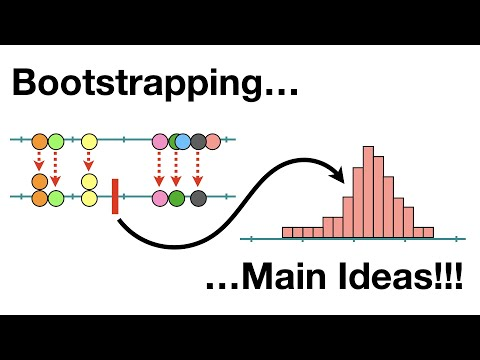

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

Q1: The standard deviation represent the spread of individual data points around the mean, indicating how much the values in a dataset typically deviate from the average. In contrast, the standard error of the mean reflects the precision of the sample mean as an estimate of the population mean, decreasing as the sample size grows. While standard deviation captures the variability within a dataset, the standard error of mean focuses on the accuracy of the mean estimate.


Q2: If I want to calculate the 95% confidence interval of a data set. There is a formula to calculate the interval which is: Sample mean ± 1.96 times the SEM(standard error of the mean).And the way to calculate the SEM is dividing the sample's standard deviation by the square root of the sample size. Multiplying the SEM by 1.96 (the Z-score for 95% confidence) gives the margin of error. Adding and subtracting this margin from the sample mean provides the bounds of the interval, which should encompass about 95% of the bootstrapped sample means.

Q3:To calculate a 95% bootstrapped confidence interval by using the bootstrapped means. Resample the original dataset many times with replacement and calculate the mean for each bootstrap sample. After sorting these bootstrapped means, find the 2.5th and 97.5th percentiles, which form the lower and upper bounds of the confidence interval. This method captures the middle 95% of the bootstrapped means, providing a non-parametric way to estimate the confidence interval without relying on standard error calculations or normality assumptions.

In [1]:
import numpy as np

# Generate a random sample data (for demonstration)
np.random.seed(42)  # For reproducibility
sample_data = np.random.normal(loc=50, scale=10, size=100)  # Sample of 100 from a normal distribution

# Define the number of bootstrap samples
num_bootstrap_samples = 10000

# Function to perform bootstrapping
def bootstrap_confidence_interval(data, num_samples, alpha=0.05, statistic=np.mean):
    # Generate bootstrap samples and calculate the statistic for each sample
    bootstrap_means = np.array([
        statistic(np.random.choice(data, size=len(data), replace=True)) 
        for _ in range(num_samples)
    ])
    
    # Calculate the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(bootstrap_means, 100 * (alpha / 2))
    upper_bound = np.percentile(bootstrap_means, 100 * (1 - alpha / 2))
    
    return lower_bound, upper_bound

# Calculate the 95% confidence interval for the population mean
ci_mean = bootstrap_confidence_interval(sample_data, num_bootstrap_samples)
print(f"95% Bootstrap Confidence Interval for Population Mean: {ci_mean}")

# To calculate the 95% bootstrap confidence interval for the population median,
# you can change the 'statistic' parameter to np.median in the function call.
ci_median = bootstrap_confidence_interval(sample_data, num_bootstrap_samples, statistic=np.median)
print(f"95% Bootstrap Confidence Interval for Population Median: {ci_median}")


95% Bootstrap Confidence Interval for Population Mean: (47.17362242607048, 50.699416505110996)
95% Bootstrap Confidence Interval for Population Median: (46.98896304410711, 51.315645288627366)


Q4:These code above first generates a random sample of 100 observations from a normal distribution and defines a function to compute a 95% bootstrap confidence interval for a specified population parameter. Then I can use the bootstrap_confidence_interval function creates bootstrap samples, calculates the specified statistic (mean by default), and determines the lower and upper bounds of the confidence interval using the appropriate percentiles. After that, the code calculates and prints the confidence interval for the population mean.What's more,changing the statistic argument to np.median can adjust the function to calculate the confidence interval for the population median.

Q5:Population parameters describe the entire population but are often unknown. In contrast, sample statistics are calculated from a subset of the population and serve as estimates for these parameters. Confidence intervals help quantify the uncertainty associated with these estimates by providing a range of plausible values for the population parameter, accounting for sampling variation. Recognizing this distinction enables researchers to make informed inferences and accurately interpret statistical results, highlighting the limitations and variability inherent in sample data.

Q6: 
What is the process of bootstrapping?
The process of bootstrapping is randomly pick a data from sample with a specific range, then put the data back into the sample and repeat it in many times.The number of picked samples for each time should be the same.

What is the main purpose of bootstrapping?
The main purpose of bootstrapping is to estimate the sampling distribution of a statistic by resampling the observed data with replacement. It can help us to assess variability, confidence intervals, and properties of estimators without strong assumptions about the underlying population distribution. And it's especially useful for small sample sizes or when traditional inference methods are difficult to apply, providing a robust, non-parametric approach to statistical inference.

If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?
Just doing the process of bootstrapping,I can collect a sample of size n from the population and then calculate the mean of sample.After that, I can select a Bootstrap Samples and calculate it's mean and then construct a confidence interval(Usually 95%).Fianlly, by compare the hypothesized mean to the confidence interval,if the hypothesized mean falls within the confidence interval, it suggests that the guess is plausible.Otherwise it indicates that the hypothesized mean may not be a reasonable estimate of the population mean based on your sample data.

Q7: This becasue a confidence interval that overlaps zero suggests that the true population parameter could be zero, indicating no statistically significant difference or effect, even if the observed sample mean itself is not zero. This leads to a failure to reject the null hypothesis. On the other hand, if the confidence interval does not overlap zero, it implies that all plausible values for the population parameter are either above or below zero, indicating a statistically significant effect and providing enough evidence to reject the null hypothesis. Therefore, the decision to reject or fail to reject the null hypothesis depends on the confidence interval's relationship with zero, rather than just the value of the sample mean.

Q8:
Introduction:
In this context, the null hypothesis (H₀) posits that there is no effect of the vaccine on the health scores of patients. This means that any observed changes in health scores were casue from random variation rather than the vaccine's influence. If we can provide sufficient statistical evidence to reject the null hypothesis, it would suggest that the vaccine is effective in improving health outcomes.

Data visualization:
To visualize the comparison of initial and final health scores, I choose to create a box plot.It can help us see the distribution of scores before and after taking the vaccine.

Quantitative analysis:
I will use a paired t-test to evaluate the effectiveness of the vaccine(I learned it from my high school bio course). A paired t-test is appropriate here because we are comparing two related samples (the health scores before and after taking the vaccine from the same individuals). The purpose of this test is to determine whether the mean difference between the paired observations is significantly different from zero.

Findings and Discussion:
After conducting the paired t-test, compare the p-value against the significance level (alpha = 0.05). If the p-value is less than 0.05, we can reject the null hypothesis and conclude that the vaccine has a significant effect on improving health scores.Otherwise we fail to reject the null hypothesis, which suggesting that the vaccine does not significantly affect health outcomes.

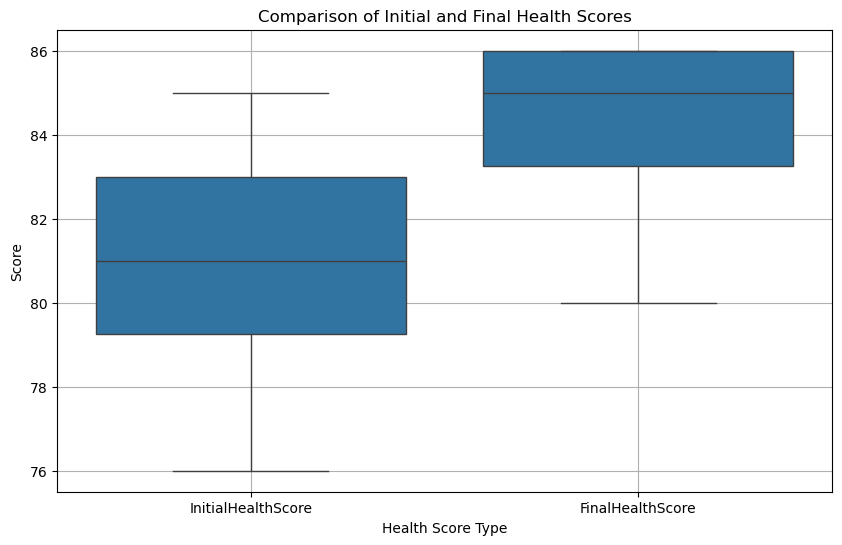

T-statistic: 2.5900615612703937
P-value: 0.02921052381549256
Reject the null hypothesis: The vaccine appears to be effective.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
data = pd.DataFrame({
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
})
melted_data = data.melt(id_vars=['PatientID'], 
                         value_vars=['InitialHealthScore', 'FinalHealthScore'], 
                         var_name='Health Score Type', 
                         value_name='Score')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Health Score Type', y='Score', data=melted_data)
plt.title('Comparison of Initial and Final Health Scores')
plt.xlabel('Health Score Type')
plt.ylabel('Score')
plt.grid(True)
plt.show()
data['ScoreDifference'] = data['FinalHealthScore'] - data['InitialHealthScore']
t_statistic, p_value = stats.ttest_rel(data['FinalHealthScore'], data['InitialHealthScore'])
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis: The vaccine appears to be effective."
else:
    conclusion = "Fail to reject the null hypothesis: The vaccine does not appear to have a significant effect."

print(conclusion)

Here’s a summary of our chat log:

1. **Standard Error of the Mean vs. Standard Deviation**:
   - You asked about the differences between the standard error of the mean (SEM) and the standard deviation (SD) of original data, focusing on the distinct concepts each captures.

2. **Creating a 95% Confidence Interval Using Standard Error**:
   - You inquired how to use the SEM to create a 95% confidence interval that covers 95% of the bootstrapped sample means.

3. **Creating a 95% Bootstrapped Confidence Interval**:
   - You sought guidance on creating a 95% confidence interval using bootstrapped means without relying on their standard deviation to estimate the SEM.

4. **Detailed Explanation with Code**:
   - I provided detailed steps for generating a 95% bootstrapped confidence interval and offered a Python code example that illustrates how to create confidence intervals for both the population mean and median.

5. **Distinction Between Population Parameter and Sample Statistic**:
   - We discussed why it is important to distinguish between the roles of the population parameter and the sample statistic in the context of confidence intervals.

6. **Confidence Interval Overlapping Zero**:
   - You asked why a confidence interval that overlaps zero leads to failing to reject the null hypothesis, even when the observed sample mean is not zero, and what would lead to rejecting the null hypothesis in this context.

If you have any additional questions or topics you’d like to explore, feel free to ask!

https://chatgpt.com/c/66ff2ec8-a074-8011-9de3-904b49e61154